# TP: Jeu de la vie

***
> __Auteur__: Joseph Salmon
> <joseph.salmon@umontpellier.fr>

# Exercice 1: Jeu de la vie:

Le **jeu de la vie** est un automate cellulaire mis au point par le mathématicien britannique John Horton Conway en 1970. Il constitue l'exemple le plus connu d'un automate cellulaire. Le "jeu" est en fait un jeu à zéro joueur, ce qui signifie que son évolution est déterminée par son état initial et ne nécessite aucune intervention de la part de joueurs. On interagit avec le jeu de la vie en créant une configuration initiale; il ne reste plus alors qu'à observer son évolution.

L'univers du **jeu de la vie** est une grille orthogonale bidimensionnelle infinie (dans la suite on la supposera finie pour éviter toute difficulté) de cellules carrées, chacune d'entre elles se trouvant dans l'un des deux états possibles:

- vivant
- mort
    
Chaque cellule interagit avec ses huit voisins, qui sont les cellules directement adjacentes horizontalement, verticalement ou en diagonale. A chaque pas dans le temps, les transitions suivantes se produisent:

- Toute cellule morte ayant exactement 3 voisins vivants devient une cellule vivante (**naissance**)
- Toute cellule vivante avec 2 ou 3 voisins vivants vit inchangée jusqu'à la génération suivante (**équilibre**)
- Toute cellule vivante ayant 0 ou 1 voisin vivant décède (**mort par isolement**)
- Toute cellule vivante ayant 4 voisins vivants (**mort par étouffement**)

Le modèle initial constitue la "graine" du système. La première génération est créée en appliquant les règles ci-dessus simultanément à chaque cellule de la graine - les naissances et les décès se produisent simultanément, et le moment discret auquel cela se produit est parfois appelé une tique. (En d'autres termes, chaque génération est une fonction pure de la précédente.) Les règles continuent d'être appliquées de manière répétée pour créer d'autres générations.

Plus de détails pour les curieux: https://fr.wikipedia.org/wiki/Jeu_de_la_vie

## Imports standards

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import time
import matplotlib.animation as animation
from IPython.display import HTML
plt.set_cmap("gray_r")

In [ ]:
# Q4

In [ ]:
def calcul_nb_voisins(Z):
    forme = len(Z), len(Z[0])
    N = [[0, ] * (forme[0]) for i in range(forme[1])]
    for x in range(1, forme[0] - 1):
        for y in range(1, forme[1] - 1):
            N[x][y] = Z[x-1][y-1]+Z[x][y-1]+Z[x+1][y-1] \
                    + Z[x-1][y]  +             +Z[x+1][y]   \
                    + Z[x-1][y+1]+Z[x][y+1]+Z[x+1][y+1]
    return N

In [ ]:
Z = [[0,0,0,0,0,0],
     [0,0,0,1,0,0],
     [0,1,0,1,0,0],
     [0,0,1,1,0,0],
     [0,0,0,0,0,0],
     [0,0,0,0,0,0]]

In [ ]:
N = calcul_nb_voisins(Z)

In [ ]:
N

In [ ]:
def iteration_jeu(Z):
    forme = len(Z), len(Z[0])
    N = calcul_nb_voisins(Z)
    for x in range(1, forme[0] - 1):
        for y in range(1, forme[1] - 1):
            if Z[x][y] == 1 and (N[x][y] < 2 or N[x][y] > 3):
                Z[x][y] = 0
            elif Z[x][y] == 0 and N[x][y] == 3:
                Z[x][y] = 1
    return Z

In [ ]:
Z

In [ ]:
iteration_jeu(Z)

In [ ]:
Z = [[0,0,0,0,0,0],
     [0,0,0,1,0,0],
     [0,1,0,1,0,0],
     [0,0,1,1,0,0],
     [0,0,0,0,0,0],
     [0,0,0,0,0,0]]

In [ ]:
# Q5
fig, axs = plt.subplots(2, 5, figsize=(8, 5), facecolor='w', edgecolor='k')
axs = axs.ravel()

axs[0].tick_params(axis='both', which='both', bottom=False,
                   top=False, left=False, right=False, labelbottom=False, labelleft=False)
axs[0].imshow(np.asarray(Z).T)
axs[0].set_title(str('iteration: {}'.format(0)))

axs[0].grid(True, color='grey', linestyle='-', linewidth=2, which='minor')
axs[0].set_xticks(np.arange(-.5, len(Z), 1), minor=True)
axs[0].set_yticks(np.arange(-.5, len(Z[0]), 1), minor=True)

for i in range(1, 10):
    axs[i].imshow(np.asarray(iteration_jeu(Z)).T)
    axs[i].grid(True, color='grey', linestyle='-', linewidth=2, which='minor')
    axs[i].set_xticks(np.arange(-.5, len(Z), 1), minor=True)
    axs[i].set_yticks(np.arange(-.5, len(Z[0]), 1), minor=True)
    axs[i].tick_params(axis='both', which='both', bottom=False,
                       top=False, left=False, right=False, labelbottom=False, labelleft=False)
    axs[i].set_title(str('iteration: {}'.format(i)))


plt.show()

Rem: se rappeler que l'on utilise une bordure de largeur unitaire, qui vaut tout le temps zero tout autour de la carte. 

In [ ]:
# Q6:

L'état du jeu en zéro est les même en 0 qu'en 4, à ceci près que la forme à été translaté en bas à gauche (c'est un **glider**)

In [ ]:
# Q7
vect = np.array([0,1,0,0,1,1])

In [ ]:
vect[:-2]

In [ ]:
vect[1:-1]

In [ ]:
vect[2:]

In [ ]:
nb_vect = np.zeros(vect.shape)
nb_vect[1:-1] += (vect[:-2] + vect[2:])
nb_vect

In [ ]:
# Q8
Z_np = np.array(
     [[0,0,0,0,0,0],
     [0,0,0,1,0,0],
     [0,1,0,1,0,0],
     [0,0,1,1,0,0],
     [0,0,0,0,0,0],
     [0,0,0,0,0,0]])

In [ ]:
def calcul_nb_voisins_np(Z_np):
    N_np = np.zeros(Z_np.shape)
    N_np[1:-1, 1:-1] += (Z_np[ :-2, :-2] + Z_np[ :-2,1:-1] + Z_np[ :-2,2:] +
                         Z_np[1:-1, :-2]                   + Z_np[1:-1,2:] +
                         Z_np[2:  , :-2] + Z_np[2:  ,1:-1] + Z_np[2:  ,2:])
    return N_np

In [ ]:
calcul_nb_voisins_np(Z_np)

In [ ]:
# Q9

In [ ]:
def iteration_jeu_np(Z_np):
    Z_out = np.zeros(Z_np.shape)
    N_np = calcul_nb_voisins_np(Z_np)
    naissance = (N_np == 3)[1:-1, 1:-1] & (Z_np[1:-1, 1:-1] == 0)
    survie = ((N_np == 2) | (N_np == 3))[1:-1, 1:-1] & (Z_np[1:-1, 1:-1] == 1)
    Z_out[0, :] = Z_np[-1, :] = Z_np[:, 0] = Z_np[:, -1] = 0
    Z_out[1:-1, 1:-1][naissance | survie] = 1
    return Z_out

In [ ]:
# Q10
def jeu_np(mat_in,nb_iter):
    mat_out = mat_in.copy()
    for i in range(nb_iter):
        mat_out = iteration_jeu_np(mat_out)
    return mat_out

In [ ]:
# Test:
fig2, axs = plt.subplots(2, 5, figsize=(8, 4))
axs = axs.ravel()

for i in range(0, 10):
    axs[i].imshow(np.asarray(jeu_np(Z_np, i)).T)
    axs[i].grid(True, color='grey', linestyle='-', linewidth=2, which='minor')
    axs[i].set_xticks(np.arange(-.5, Z_np.shape[0], 1), minor=True)
    axs[i].set_yticks(np.arange(-.5, Z_np.shape[1], 1), minor=True)
    axs[i].tick_params(axis='both', which='both', bottom=False,
                       top=False, left=False, right=False, labelbottom=False, labelleft=False)
plt.show()

In [ ]:
# Q11
%matplotlib notebook

In [ ]:
fig_film_tore = plt.figure()


def updatefig(i):
    im.set_array(jeu_tore(Z_random, i)[1:-1,1:-1])
    return im,

im = plt.imshow(Z_random, animated=True)

ani = animation.FuncAnimation(fig_film_tore, updatefig, blit=True, frames=200,
                              interval=20)
plt.show()
# plt.close(ani._fig)
# HTML(ani.to_html5_video())
# décommenter pour sauver:
# ani.save("random_random.mp4", fps=60)
# MORE on gif export: https://nickcharlton.net/posts/drawing-animating-shapes-matplotlib.html

# Exercice 2: Régression logistique

In [1]:
import numpy as np

import matplotlib.pyplot as plt

# For new sklearn version
# from sklearn.datasets import fetch_openml
# Load data from https://www.openml.org/d/554

from sklearn.datasets import fetch_mldata
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.utils import check_random_state

In [3]:
mnist = fetch_mldata('MNIST original')
X = mnist.data.astype('float64')
y = mnist.target

In [4]:
# Facultatif
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

In [5]:
# Selection des nombres
dig_val = [3, 7]
idxs = (y == dig_val[0]) + (y == dig_val[1])
y = y[idxs]
X = X[idxs]

array([False, False, False, ...,  True,  True, False])

In [6]:
y.shape

(14434,)

In [7]:
random_state = np.random.RandomState(0)
# permutation = random_state.permutation(X.shape[0])
# X = X[permutation]
# y = y[permutation]

X_train, X_test, y_train, y_test = \
  train_test_split(X, y, train_size=0.8,
                   random_state=random_state)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/home/jo/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Régression Logistique:

In [8]:
# def logistic_regression_no_jit(y, X, w, iterations=1000):
#     for i in range(iterations):
#         w -= np.dot(((1.0 / (1.0 + np.exp(-y * np.dot(X, w))) - 1.0) * y), X)
#     return w

Régression Logistique + jit:

In [9]:
# Régression Logistique + lbfgs/sklearn
logreg = LogisticRegression(solver='lbfgs', max_iter=1000,fit_intercept=False)
logreg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
print('test score = {}'.format(logreg.score(X_test, y_test)))

test score = 0.9878766886040873


In [11]:
%matplotlib notebook

In [12]:
def affiche(x):
    plt.figure()
    plt.title('Prediction: %s. Confidence: %d %%' % (logreg.predict([x])[0], 100 * logreg.predict_proba([x]).max()))
    plt.imshow(scaler.inverse_transform(x).reshape(28, 28),
               cmap=plt.cm.gray_r, vmin=0, vmax=255)
    plt.axis('off')

Remember that the decision function is defined with a hyperplane 𝑤⊤𝑥+𝑏. Thus, taking a certain x, we can move it in the hyperplane by doing:
𝑥1=𝑥−𝑤⊤𝑥+𝑏𝑤⊤𝑤𝑤

In [13]:
pca = PCA(n_components=2)
X_r = pca.fit(X_train).transform(X_train)

In [14]:
coef_r = pca.transform(logreg.coef_)
# w_1 x_1 +w_2 x_2 = 0 <=> x_2 = (-w_1 x_1)/w2
x_grid = np.linspace(-15, 20, num=10)
y_grid = - coef_r[0][0] / coef_r[0][1] * x_grid

<IPython.core.display.Javascript object>


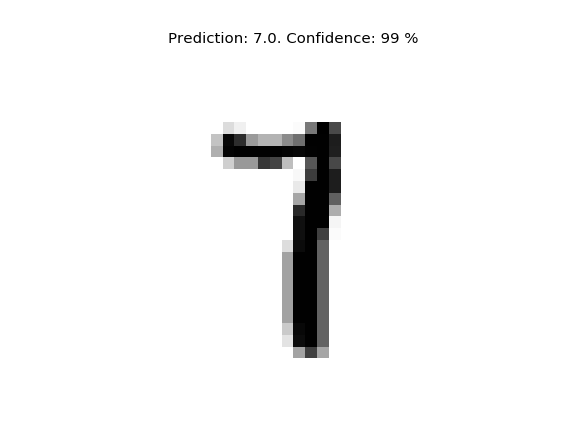

In [15]:
w = logreg.coef_[0]

idx_oi = 100
affiche(X_train[idx_oi])

In [16]:
x1 = X_train[idx_oi] - w * np.dot(w, X_train[idx_oi]) / np.dot(w, w) 
x1_r = pca.transform(x1.reshape(1,-1))
print(x1.shape,x1_r.shape)

logreg.predict_proba([x1])

(784,) (1, 2)


array([[0.5, 0.5]])

<IPython.core.display.Javascript object>


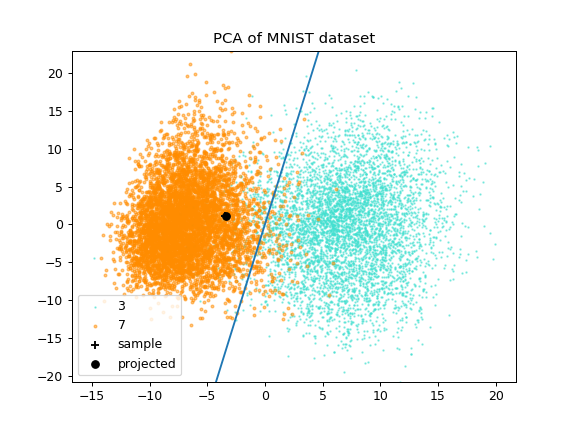

Text(0.5,1,'PCA of MNIST dataset')

In [20]:
plt.figure()
colors = ['turquoise', 'darkorange']

coef_r = pca.transform(logreg.coef_)

for color, i, target_name in zip(colors, dig_val, y_train):
    plt.scatter(X_r[y_train == i, 0], X_r[y_train == i, 1], color=color, alpha=.5, s=i**2 / 10,
                label=i)
plt.plot(x_grid, y_grid)
plt.scatter(X_r[idx_oi, 0], X_r[idx_oi, 1],
            marker='+', color='k', label='sample')
plt.scatter(x1_r[0,0], x1_r[0,1], color='k', label='projected')

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.ylim(X_r[:, 1].min(), X_r[:, 1].max())

plt.title('PCA of MNIST dataset')

In [21]:
X_r[idx_oi,0],X_r[idx_oi,1]

(-3.457257938434434, 1.1275223182865275)

In [22]:
x1[0], x1[1]

(0.0, 0.0)

In [23]:
x1, pca.transform(x1.reshape(-1,1))


(array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.0

In [ ]:
logreg.coef_[0]

In [92]:
def fig_digit_proj(alpha=1):

    x1 = X_train[idx_oi] - alpha * w * \
        np.dot(w, X_train[idx_oi]) / np.dot(w, w)
    plt.title('Prediction: %s. Confidence: %d %%' % (
        logreg.predict([x1])[0], 100 * logreg.predict_proba([x1]).max()))
    plt.imshow(scaler.inverse_transform(x1).reshape(
        28, 28), cmap=plt.cm.gray_r, vmin=0, vmax=255)
    plt.axis('off')
    plt.show()


In [93]:
%matplotlib inline

In [94]:
from ipywidgets import interact

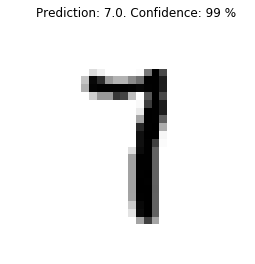

In [95]:
fig = plt.figure(figsize=(10, 5))
interact(fig_digit_proj, alpha=(0.1, 100, 0.1));

In [91]:
logreg_r = LogisticRegression(solver='lbfgs', max_iter=1000,fit_intercept=False)
logreg_r.fit(X_r, y_train)

w_r = logreg_r.coef_[0]
print(w_r)

[-0.86550042  0.02215464]


In [72]:
def fig_digit_proj_r(alpha=1):

    x1_r = X_r[idx_oi,:] - alpha * w_r.squeeze() * \
        np.dot(w_r, X_r[idx_oi,:]) / np.dot(w_r, w_r)
    fig, axes = plt.subplots(1, 2, sharex='col',figsize=(10,5))

    x1_back = x1_r.dot(pca.components_)   
    axes[0].set_title('Prediction: %s. Confidence: %d %%' % (
        logreg_r.predict([x1_r])[0], 100 * logreg_r.predict_proba([x1_r]).max()))
    axes[0].imshow(scaler.inverse_transform(x1_back).reshape(
        28, 28), cmap=plt.cm.gray_r, vmin=0, vmax=255)
    axes[0].axis('off')
    axes[0].axis('off')

    colors = ['turquoise', 'darkorange']

    x_grid = np.linspace(-15, 20, num=10)
    y_grid = - w_r[0] / w_r[1] * x_grid
    for color, i, target_name in zip(colors, dig_val, y_train):
        axes[1].scatter(X_r[y_train == i, 0], X_r[y_train == i, 1], color=color, alpha=.5, s=i**2 / 10,
                        label=i)
    axes[1].plot(x_grid, y_grid)
    axes[1].scatter(X_r[idx_oi, 0], X_r[idx_oi, 1],
                    marker='+', color='k', label='sample')
    axes[1].scatter(x1_r[0], x1_r[1], color='k', label='projected')

    axes[1].legend(loc='best', shadow=False, scatterpoints=1)
    axes[1].set_ylim(X_r[:, 1].min(), X_r[:, 1].max())

    axes[1].set_title('PCA of MNIST dataset')
    plt.tight_layout()

<IPython.core.display.Javascript object>


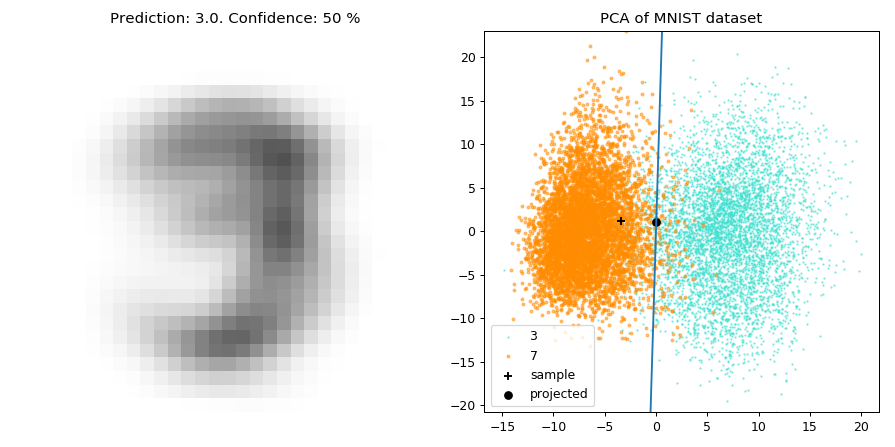

In [73]:
fig, axes = plt.subplots(1, 2, sharex='col')
interact(fig_digit_proj_r, alpha=(0.1, 5, 0.1));

In [74]:
X_r[idx_oi].shape

(2,)

In [ ]:
np.dot(w_r, X_r[idx_oi])

In [ ]:
w_r.squeeze().shape
alpha=1

In [ ]:
X_r[idx_oi,:] -alpha * w_r.squeeze() * np.dot(w_r, X_r[idx_oi,:]) / np.dot(w_r, w_r)